In [5]:
# loading relevant libraries

import pandas as pd

import numpy as np

import json

# visualization libraries

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
# plt.style.available
# plt.style.use('ggplot')
plt.style.use('seaborn-pastel')
import seaborn as sns

import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# import panel as pn
# pn.extension("tabulator", sizing_mode="stretch_width")

# import hvplot.pandas
# import holoviews as hv
# hv.extension("bokeh")

# !pip install voila ==0.3.0a2


# ! pip install plotly dash flask

# preprocessing and modelling libraries

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, mean_squared_error
from sklearn.metrics import roc_curve, auc

#### Background Knowledge

Abortion selfcare is giving the power to women. Women First Digital empowers women with information through its many websites 
to understand abortion selfcare and properly address their needs for good reproductive care. In this case, the woman full understands
and is in control of the process with and without the involvement of a healthcare provider. In this project, data was collected
from the self2choose website on the users interaction with the website in a bid to acquire more information on abortion services.
A predictive algorithm will be built that predicts the status of the enquiries made by users to ensure that they are getting effective
services through their enquiries. 

#### Objectives

- Build a predictive algorith that will predict the likelihood of an enquiry being closed or open. The algorithm with the lowest 
  RMSE will be used.
- Determine patterns within the data.

#### Evaluation Metric

Using RMSE or logloss with the lowest one being the best model predictor. RMSE measures average difference between values predicted
and actual values.

#### loading datasets

In [6]:
# loading first file

df1 = pd.read_excel("Counselling_referral data_Sep - Dec 2022 - safe2choose.xlsx")
pd.set_option('display.max_columns', None)
df1.head()

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,First response status,Tags,Countries (NEW),Region,Agent 2,Agent 3,Language,City,Age,Gestational weeks at first contact,+ days,Main reason for contact,Subreason 1,Subreason 2,2nd reason for contact,2nd Subreason 1,3rd reason for contact,3rd Subreason 1,In possession of pills,Kind of pills,Amount of pills,Abortion method counselled on,MA,MVA/EVA,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,ref-Subreason 1,Referred to on-the-ground org,Referred to direct provider
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,2,Within SLA,NaN,NaN,NaN,NaN,NaN,Spanish,NaN,NaN,NaN,NaN,Suspected Pregnancy/Pregnancy confirmation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,No,NaN,Suspected Pregnancy,NaN,NaN,False,False
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,1,NaN,Away conversation,NaN,NaN,NaN,NaN,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,00:00:00,0,1,NaN,NaN,NaN,NaN,NaN,NaN,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,00:00:00,1,1,Within SLA,NaN,Argentina,NaN,NaN,NaN,Spanish,NaN,NaN,NaN,NaN,Access to abortion services/Help General,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,No,NaN,Dropped,NaN,NaN,False,False
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,1,NaN,Away conversation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,False


In [7]:
# exploring the dataset characteristics

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ticket ID                                      2336 non-null   int64  
 1   Status                                         2336 non-null   object 
 2   Source                                         2336 non-null   object 
 3   Agent                                          2336 non-null   object 
 4   Group                                          2336 non-null   object 
 5   Created time                                   2336 non-null   object 
 6   Month                                          2336 non-null   object 
 7   Last update time                               2336 non-null   object 
 8   Resolution time (in hrs)                       2336 non-null   object 
 9   Agent interactions                             2336 

In [8]:
df1.columns

Index(['Ticket ID', 'Status', 'Source', 'Agent', 'Group', 'Created time',
       'Month', 'Last update time', 'Resolution time (in hrs)',
       'Agent interactions', 'Customer interactions', 'First response status',
       'Tags', 'Countries (NEW)', 'Region', 'Agent 2', 'Agent 3', 'Language',
       'City', 'Age', 'Gestational weeks at first contact', '+ days',
       'Main reason for contact', 'Subreason 1', 'Subreason 2',
       '2nd reason for contact', '2nd Subreason 1', '3rd reason for contact',
       '3rd Subreason 1', 'In possession of pills', 'Kind of pills',
       'Amount of pills', 'Abortion method counselled on', 'MA', 'MVA/EVA',
       'D&E', 'Induction', 'PAC', 'Referral ',
       'Ability to pay for referral services/products',
       'Reason for not referring', 'Reason for referral', 'ref-Subreason 1',
       'Referred to on-the-ground org', 'Referred to direct provider'],
      dtype='object')

In [9]:
# exploring information from different columns

df1.Status.value_counts()

Waiting on KQ                   655
Resolved                        397
Waiting on User                 308
Waiting on KQ - reminder        298
Closed                          228
Referral                        227
Evaluation sent                 154
Referral - reminder              35
Need to fill properties chat     22
Open                             12
Name: Status, dtype: int64

In [10]:
# exploring different columns

df1["Abortion method counselled on"].value_counts()

Which methods    412
Name: Abortion method counselled on, dtype: int64

In [11]:
# loading second dataset

df2 = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx")
df2.head()

,Default Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
0,Organic Search,908831,835236,1168784,0.138337,2.787992,95.430919
1,Paid Search,208793,195714,306754,0.774842,1.362307,23.712111
2,Direct,196238,194134,230303,0.169594,2.999462,101.461001
3,Referral,12982,11125,16405,0.128436,4.324169,164.829930
4,Social,7645,6875,8915,0.131015,5.106786,151.808301


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Default Channel Grouping  7 non-null      object 
 1   Users                     7 non-null      int64  
 2   New Users                 7 non-null      int64  
 3   Sessions                  7 non-null      int64  
 4   Bounce Rate               7 non-null      float64
 5   Pages/Session             7 non-null      float64
 6   Avg. Session Duration     7 non-null      float64
dtypes: float64(3), int64(3), object(1)
memory usage: 520.0+ bytes


In [13]:
# loading different excel sheets from second dataset

df_age = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name=1)
df_age.head()

,Age,Users
0,18-24,148670
1,25-34,133562
2,35-44,67560
3,45-54,41398
4,55-64,25973


In [14]:
# loading third sheet

df_gender = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name=2)
df_gender.head()

,Gender,Users
0,female,271582
1,male,237350


In [15]:
# loading fourth sheet

df_visits = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name=3)
df_visits.head()

,Page,Page Views,Unique Page Views,Avg. Time on Page,Entrances,Bounce Rate,% Exit
0,/es/safe-abortion/abortion-pills/abortion-with...,213211,104666,68.005218,93371,0.134155,0.439110
1,/,206788,112562,40.616076,85384,0.218065,0.284741
2,/hi/safe-abortion/abortion-pills/types-abortio...,194308,92092,55.053400,86218,0.107318,0.442658
3,/abortion-pill-information,158841,134952,66.963177,132388,0.810458,0.821167
4,/safe-abortion/abortion-pills/using-mifepristo...,141541,70847,78.848416,59482,0.133565,0.424153


In [16]:
# loading fifth sheet 

df_geo = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name=4)
df_geo.head()

,Country,Users,New Users,Sessions,Bounce Rate,Pages/Session,Avg. Session Duration
0,India,172126,173438,213566,0.119153,2.472627,73.011327
1,Brazil,106594,105322,142237,0.120834,3.263483,114.385638
2,Philippines,99889,97929,128124,0.136766,2.729372,114.057764
3,Mexico,90855,89773,124194,0.257484,2.698222,76.659275
4,Liberia,60141,59960,60819,0.277791,2.437741,44.913547


In [17]:
# loading sixth sheet

df_users = pd.read_excel("Google Anlaytics data_Sep-Dec 22-safe2choose.xlsx", sheet_name=5)
df_users.head()

,Day Index,Users
0,2022-09-01,8232
1,2022-09-02,8179
2,2022-09-03,7755
3,2022-09-04,7231
4,2022-09-05,8112


#### Data Cleaning

In [18]:
# checking data shape 

df1.shape

(2336, 45)

In [19]:
# checking data structure

df1.dtypes

Ticket ID                                          int64
Status                                            object
Source                                            object
Agent                                             object
Group                                             object
Created time                                      object
Month                                             object
Last update time                                  object
Resolution time (in hrs)                          object
Agent interactions                                 int64
Customer interactions                              int64
First response status                             object
Tags                                              object
Countries (NEW)                                   object
Region                                           float64
Agent 2                                           object
Agent 3                                           object
Language                       

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 45 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ticket ID                                      2336 non-null   int64  
 1   Status                                         2336 non-null   object 
 2   Source                                         2336 non-null   object 
 3   Agent                                          2336 non-null   object 
 4   Group                                          2336 non-null   object 
 5   Created time                                   2336 non-null   object 
 6   Month                                          2336 non-null   object 
 7   Last update time                               2336 non-null   object 
 8   Resolution time (in hrs)                       2336 non-null   object 
 9   Agent interactions                             2336 

In [21]:
# checking for missing values in dataframe

(df1.isna().sum()/len(df1))*100

Ticket ID                                          0.000000
Status                                             0.000000
Source                                             0.000000
Agent                                              0.000000
Group                                              0.000000
Created time                                       0.000000
Month                                              0.000000
Last update time                                   0.000000
Resolution time (in hrs)                           0.000000
Agent interactions                                 0.000000
Customer interactions                              0.000000
First response status                             74.871575
Tags                                              44.734589
Countries (NEW)                                   75.470890
Region                                           100.000000
Agent 2                                           96.232877
Agent 3                                 

There are a lot of missing values in over 25 columns in the dataset which needs to be addressed.

In [22]:
df1.columns

Index(['Ticket ID', 'Status', 'Source', 'Agent', 'Group', 'Created time',
       'Month', 'Last update time', 'Resolution time (in hrs)',
       'Agent interactions', 'Customer interactions', 'First response status',
       'Tags', 'Countries (NEW)', 'Region', 'Agent 2', 'Agent 3', 'Language',
       'City', 'Age', 'Gestational weeks at first contact', '+ days',
       'Main reason for contact', 'Subreason 1', 'Subreason 2',
       '2nd reason for contact', '2nd Subreason 1', '3rd reason for contact',
       '3rd Subreason 1', 'In possession of pills', 'Kind of pills',
       'Amount of pills', 'Abortion method counselled on', 'MA', 'MVA/EVA',
       'D&E', 'Induction', 'PAC', 'Referral ',
       'Ability to pay for referral services/products',
       'Reason for not referring', 'Reason for referral', 'ref-Subreason 1',
       'Referred to on-the-ground org', 'Referred to direct provider'],
      dtype='object')

In [23]:
# exploring different columns with missing values

df1["First response status"].unique()

array(['Within SLA', nan, 'SLA Violated'], dtype=object)

We will have to explore each column to determine how to deal with each column.Columns such as Countries (NEW)', 'Region', 'Agent 2', 'Agent 3', 'Language',
       'City', 'Age', 'Gestational weeks at first contact', '+ days',
       'Main reason for contact', 'Subreason 1', 'Subreason 2',
       '2nd reason for contact', '2nd Subreason 1', '3rd reason for contact',
       '3rd Subreason 1', need to be dropped after being explored for necessity.

In [24]:
# dropping unnecessary columns

df1.drop(['Countries (NEW)', 'Region', 'Agent 2', 'Agent 3', 'Language',
       'Age', 'Subreason 1', 'Subreason 2',
       '2nd reason for contact', '2nd Subreason 1', '3rd reason for contact',
       '3rd Subreason 1','ref-Subreason 1' ], axis=1, inplace=True)

In [25]:
# checking remaining missing values in percentages

(df1.isna().sum()/len(df1))*100

Ticket ID                                         0.000000
Status                                            0.000000
Source                                            0.000000
Agent                                             0.000000
Group                                             0.000000
Created time                                      0.000000
Month                                             0.000000
Last update time                                  0.000000
Resolution time (in hrs)                          0.000000
Agent interactions                                0.000000
Customer interactions                             0.000000
First response status                            74.871575
Tags                                             44.734589
City                                             84.417808
Gestational weeks at first contact               83.561644
+ days                                           87.714041
Main reason for contact                          70.3339

In [26]:
# filling missing values with word 'missing' to indicate missing entry

df1. fillna({"First response status": "not_indicated",
           "Reason for referral": "not_indicated",
            "Reason for not referring":"not_indicated",
            "Referral ":"not_indicated",
            "Tags":"not_indicated",
            "Gestational weeks at first contact":"not_indicated",
             "+ days" : "not_indicated",
            "ageofpregnancy":"not_indicated",
            "Main reason for contact":"not_indicated",
            "In possession of pills":"not_indicated",
            "Kind of pills":"not_indicated",
            "Amount of pills":"not_indicated",
            "Abortion method counselled on":"not_indicated",
            "City":"not_indicated",
             "Ability to pay for referral services/products":"not_indicated"
           }, inplace=True)

In [27]:
(df1.isna().sum()/len(df1))*100

Ticket ID                                        0.0
Status                                           0.0
Source                                           0.0
Agent                                            0.0
Group                                            0.0
Created time                                     0.0
Month                                            0.0
Last update time                                 0.0
Resolution time (in hrs)                         0.0
Agent interactions                               0.0
Customer interactions                            0.0
First response status                            0.0
Tags                                             0.0
City                                             0.0
Gestational weeks at first contact               0.0
+ days                                           0.0
Main reason for contact                          0.0
In possession of pills                           0.0
Kind of pills                                 

No missing values left in the dataset

In [28]:
# creating new column by combining two columns

df1["ageofpregnancy"] = df1['Gestational weeks at first contact'].astype(str) +"-"+ (df1["+ days"].astype(str)) + 'days'
df1["ageofpregnancy"].tail(10)

2326    not_indicated-not_indicateddays
2327    not_indicated-not_indicateddays
2328          5 weeks-not_indicateddays
2329    not_indicated-not_indicateddays
2330    not_indicated-not_indicateddays
2331    not_indicated-not_indicateddays
2332    not_indicated-not_indicateddays
2333    not_indicated-not_indicateddays
2334    not_indicated-not_indicateddays
2335    not_indicated-not_indicateddays
Name: ageofpregnancy, dtype: object

In [29]:
df1.loc[df1['ageofpregnancy'] == "missing-missingdays", 'ageofpregnancy'] = "not_indicated"


In [30]:
df1["ageofpregnancy"].tail(10)

2326    not_indicated-not_indicateddays
2327    not_indicated-not_indicateddays
2328          5 weeks-not_indicateddays
2329    not_indicated-not_indicateddays
2330    not_indicated-not_indicateddays
2331    not_indicated-not_indicateddays
2332    not_indicated-not_indicateddays
2333    not_indicated-not_indicateddays
2334    not_indicated-not_indicateddays
2335    not_indicated-not_indicateddays
Name: ageofpregnancy, dtype: object

In [31]:
df1['ageofpregnancy'] = df1['ageofpregnancy'].str.replace('-not_indicateddays', '')
df1["ageofpregnancy"].tail(10)

2326    not_indicated
2327    not_indicated
2328          5 weeks
2329    not_indicated
2330    not_indicated
2331    not_indicated
2332    not_indicated
2333    not_indicated
2334    not_indicated
2335    not_indicated
Name: ageofpregnancy, dtype: object

In [32]:
df1.head()

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,First response status,Tags,City,Gestational weeks at first contact,+ days,Main reason for contact,In possession of pills,Kind of pills,Amount of pills,Abortion method counselled on,MA,MVA/EVA,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,Referred to on-the-ground org,Referred to direct provider,ageofpregnancy
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,2,Within SLA,not_indicated,not_indicated,not_indicated,not_indicated,Suspected Pregnancy/Pregnancy confirmation,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,No,not_indicated,Suspected Pregnancy,not_indicated,False,False,not_indicated
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,1,not_indicated,Away conversation,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,not_indicated,not_indicated,not_indicated,not_indicated,False,False,not_indicated
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,00:00:00,0,1,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,not_indicated,not_indicated,not_indicated,not_indicated,False,False,not_indicated
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,00:00:00,1,1,Within SLA,not_indicated,not_indicated,not_indicated,not_indicated,Access to abortion services/Help General,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,No,not_indicated,Dropped,not_indicated,False,False,not_indicated
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,1,not_indicated,Away conversation,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,not_indicated,not_indicated,not_indicated,not_indicated,False,False,not_indicated


In [33]:
# dropping unnecessary columns after creating new column

df1.drop(["Gestational weeks at first contact", "+ days"], axis=1, inplace=True)

In [34]:
df1.head()

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,First response status,Tags,City,Main reason for contact,In possession of pills,Kind of pills,Amount of pills,Abortion method counselled on,MA,MVA/EVA,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,Referred to on-the-ground org,Referred to direct provider,ageofpregnancy
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,00:00:00,1,2,Within SLA,not_indicated,not_indicated,Suspected Pregnancy/Pregnancy confirmation,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,No,not_indicated,Suspected Pregnancy,not_indicated,False,False,not_indicated
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,00:00:00,0,1,not_indicated,Away conversation,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,not_indicated,not_indicated,not_indicated,not_indicated,False,False,not_indicated
2,92856,Evaluation sent,Email,No Agent,Spanish,2022-09-01 00:10:48,September,2022-09-27 18:12:41,00:00:00,0,1,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,not_indicated,not_indicated,not_indicated,not_indicated,False,False,not_indicated
3,101202,Waiting on KQ - reminder,Chat,Lucy P,Spanish,2022-09-23 18:20:24,September,2022-09-30 20:23:28,00:00:00,1,1,Within SLA,not_indicated,not_indicated,Access to abortion services/Help General,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,No,not_indicated,Dropped,not_indicated,False,False,not_indicated
4,101407,Waiting on KQ,Chat,No Agent,No Group,2022-09-24 12:16:03,September,2022-09-24 12:16:03,00:00:00,0,1,not_indicated,Away conversation,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,not_indicated,not_indicated,not_indicated,not_indicated,False,False,not_indicated


In [35]:
# checking for duplicates

print(f"The data has {df1.duplicated().sum()} duplicated rows")

duplicates = df1[df1.duplicated()]
duplicates

The data has 0 duplicated rows


,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,First response status,Tags,City,Main reason for contact,In possession of pills,Kind of pills,Amount of pills,Abortion method counselled on,MA,MVA/EVA,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,Referred to on-the-ground org,Referred to direct provider,ageofpregnancy


There are no duplicated values in the first counselling dataset.

#### EDA

In [36]:
# checking shape of data

df1.shape

(2336, 31)

In [37]:
df1.columns

Index(['Ticket ID', 'Status', 'Source', 'Agent', 'Group', 'Created time',
       'Month', 'Last update time', 'Resolution time (in hrs)',
       'Agent interactions', 'Customer interactions', 'First response status',
       'Tags', 'City', 'Main reason for contact', 'In possession of pills',
       'Kind of pills', 'Amount of pills', 'Abortion method counselled on',
       'MA', 'MVA/EVA', 'D&E', 'Induction', 'PAC', 'Referral ',
       'Ability to pay for referral services/products',
       'Reason for not referring', 'Reason for referral',
       'Referred to on-the-ground org', 'Referred to direct provider',
       'ageofpregnancy'],
      dtype='object')

In [38]:
# checking datatypes

df1.dtypes

Ticket ID                                         int64
Status                                           object
Source                                           object
Agent                                            object
Group                                            object
Created time                                     object
Month                                            object
Last update time                                 object
Resolution time (in hrs)                         object
Agent interactions                                int64
Customer interactions                             int64
First response status                            object
Tags                                             object
City                                             object
Main reason for contact                          object
In possession of pills                           object
Kind of pills                                    object
Amount of pills                                 

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Ticket ID                                      2336 non-null   int64 
 1   Status                                         2336 non-null   object
 2   Source                                         2336 non-null   object
 3   Agent                                          2336 non-null   object
 4   Group                                          2336 non-null   object
 5   Created time                                   2336 non-null   object
 6   Month                                          2336 non-null   object
 7   Last update time                               2336 non-null   object
 8   Resolution time (in hrs)                       2336 non-null   object
 9   Agent interactions                             2336 non-null   

In [40]:
df1.columns

Index(['Ticket ID', 'Status', 'Source', 'Agent', 'Group', 'Created time',
       'Month', 'Last update time', 'Resolution time (in hrs)',
       'Agent interactions', 'Customer interactions', 'First response status',
       'Tags', 'City', 'Main reason for contact', 'In possession of pills',
       'Kind of pills', 'Amount of pills', 'Abortion method counselled on',
       'MA', 'MVA/EVA', 'D&E', 'Induction', 'PAC', 'Referral ',
       'Ability to pay for referral services/products',
       'Reason for not referring', 'Reason for referral',
       'Referred to on-the-ground org', 'Referred to direct provider',
       'ageofpregnancy'],
      dtype='object')

##### Checking Count of Customers across different status

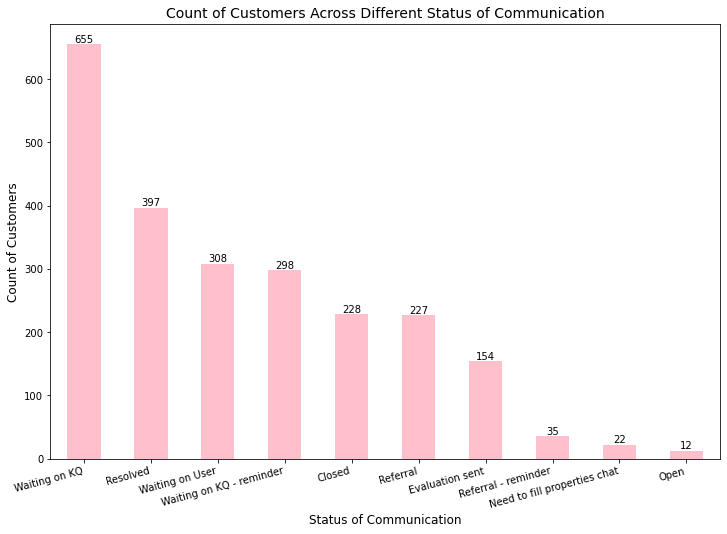

In [41]:
ax = df1["Status"].value_counts().plot(kind="bar", color="pink", figsize=(12, 8) )
plt.ylabel("Count of Customers", size=12)
plt.xlabel("Status of Communication", size=12)
plt.title("Count of Customers Across Different Status of Communication", size=14)
plt.xticks(rotation = 15, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')
alpha=(0.8)
plt.savefig("status.jpg")

This shows that the company is working well to resolve the patients

In [42]:
##### Checking Count of Customers handled by different agents

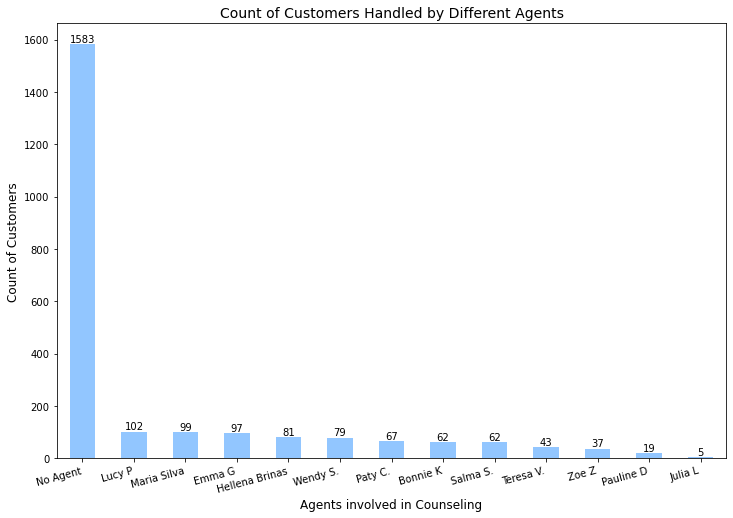

In [43]:
ax = df1["Agent"].value_counts().plot(kind="bar", figsize=(12, 8))
plt.ylabel("Count of Customers", size=12)
plt.xlabel("Agents involved in Counseling", size=12)
plt.title("Count of Customers Handled by Different Agents", size=14)
plt.xticks(rotation = 15, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig("agents.jpg")

Most users are not handled by actual agents. Perhaps since most prefer to reach out via chats, they interact with automated chat bots
rather than actual agents.

In [44]:
##### Checking Count of Customers across different languages

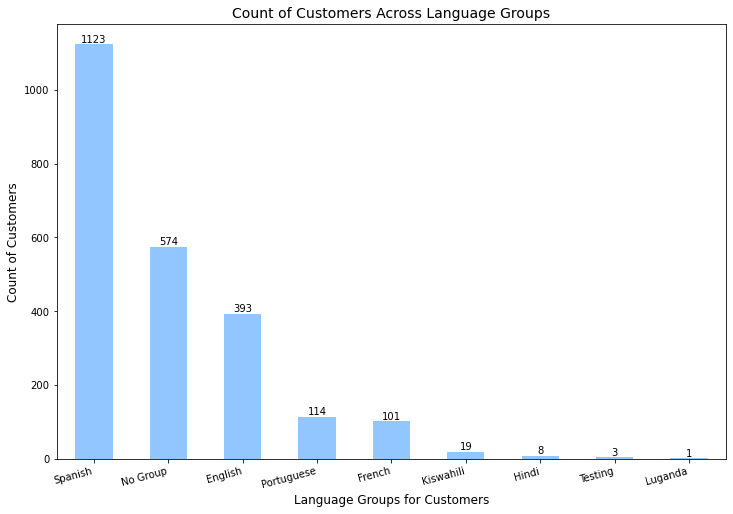

In [45]:
ax = df1["Group"].value_counts().plot(kind="bar")
plt.ylabel("Count of Customers", size=12)
plt.xlabel("Language Groups for Customers", size=12)
plt.title("Count of Customers Across Language Groups", size=14)
plt.xticks(rotation = 15, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig("languagegroup.jpg")

Most of the customers speak Spanish. Therefore, the company can ensure a multilingual website, multilingual counselors and avenues
of communication to ensure effective communication.

##### Cities According to Website Access

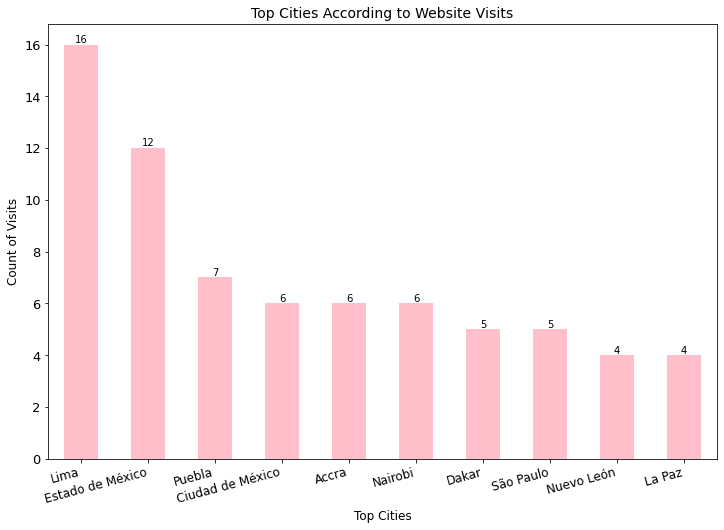

In [46]:
top_city = (df1.loc[df1['City'] != "not_indicated", 'City']).value_counts().sort_values(ascending=False).head(10)
ax = top_city.plot(kind='bar', color = 'pink', fontsize=13)
plt.xlabel("Top Cities", size=12)
plt.ylabel("Count of Visits", size=12)
plt.title("Top Cities According to Website Visits", size=14)

plt.xticks(size=12, rotation = 15, ha="right")

ax.bar_label(ax.containers[0], label_type='edge')
alpha= (0.8)
plt.savefig("cities.jpg")

Top 5 cities with highest number of individuals who have accessed the website are Lima, Estado de Mexico, Puebla, Accra and Nairobi.
This explains why the two most spoken languages are Spanish and English.


##### Top reasons why users Access the Website

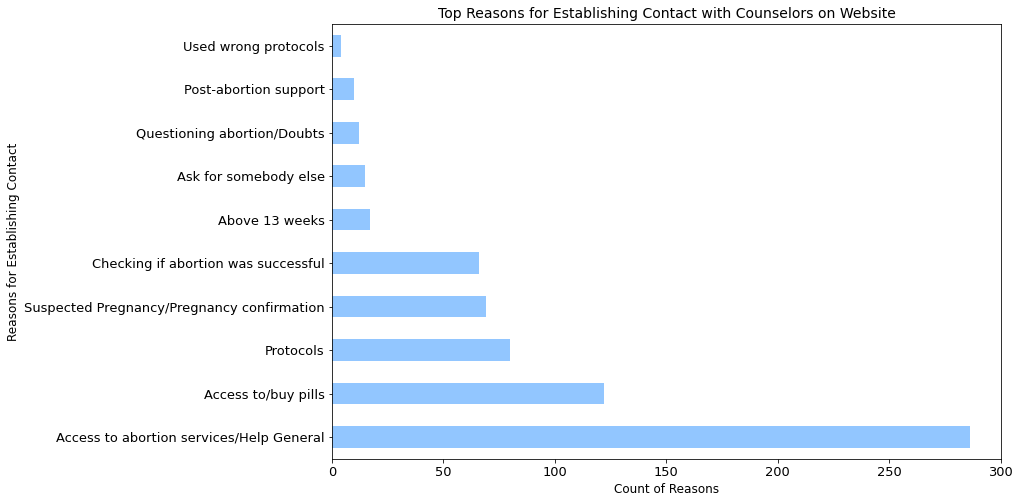

In [47]:
top_reasons = (df1.loc[df1['Main reason for contact'] != "not_indicated", 'Main reason for contact']).value_counts().sort_values(ascending=False).head(10)

ax = top_reasons.plot(kind='barh', fontsize=13)
plt.ylabel("Reasons for Establishing Contact", size=12)
plt.xlabel("Count of Reasons", size=12)
plt.title("Top Reasons for Establishing Contact with Counselors on Website", size=14)

# plt.xticks(size=12, rotation = 15, ha="right")

# for bar in bars:
#     height = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/2, "{:.1}".formatheight/100), ha = "center", va="bottom")

plt.savefig("Reasoncontact.jpg")

##### Top Reasons for Referring Users

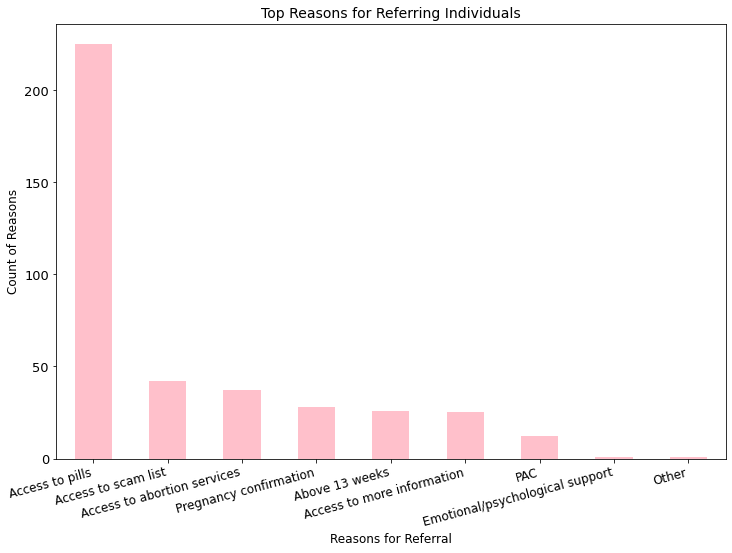

In [48]:
top_reasonsR = (df1.loc[df1['Reason for referral'] != "not_indicated", 'Reason for referral']).value_counts().sort_values(ascending=False).head(10)


ax = top_reasonsR.plot(kind='bar', fontsize=13, color="pink")
plt.xlabel("Reasons for Referral", size=12)
plt.ylabel("Count of Reasons", size=12)
plt.title("Top Reasons for Referring Individuals", size=14)

plt.xticks(size=12, rotation = 15, ha="right")
plt.savefig("ReferralReason.jpg")

##### Top Reasons for not Referring Users

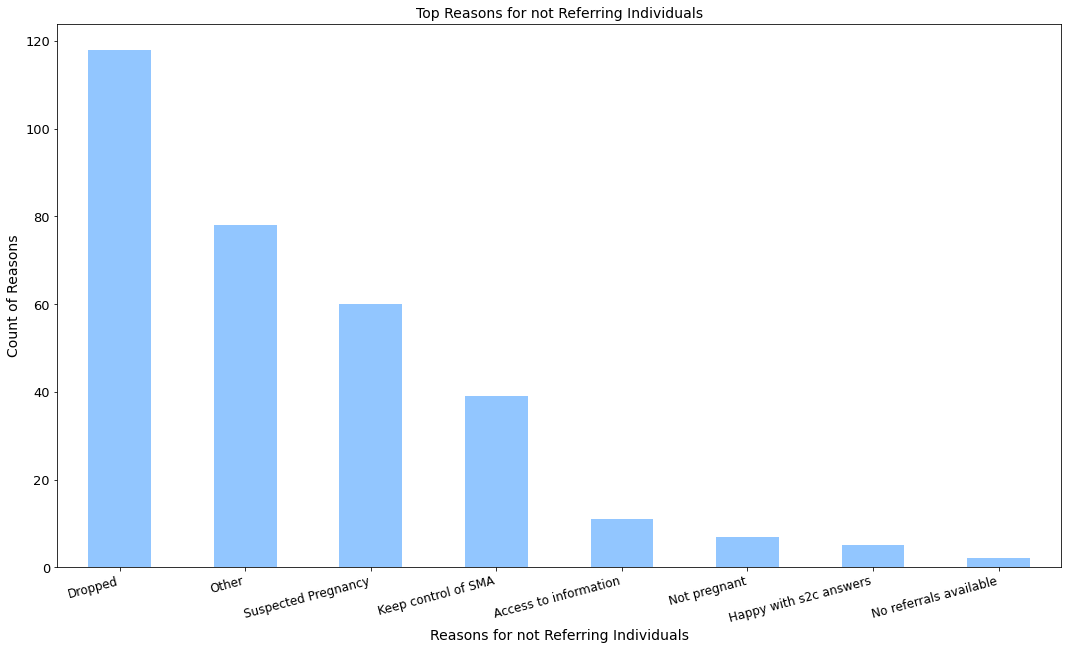

In [49]:
top_reasonsN = (df1.loc[df1['Reason for not referring'] != "not_indicated", 'Reason for not referring']).value_counts().sort_values(ascending=False).head(10)


ax = top_reasonsN.plot(kind='bar', figsize=(18,10), fontsize=13)
plt.xlabel("Reasons for not Referring Individuals", size=14)
plt.ylabel("Count of Reasons", size=14)
plt.title("Top Reasons for not Referring Individuals", size=14)

plt.xticks(size=12, rotation = 15, ha="right")

# ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("notReferralReason.jpg")

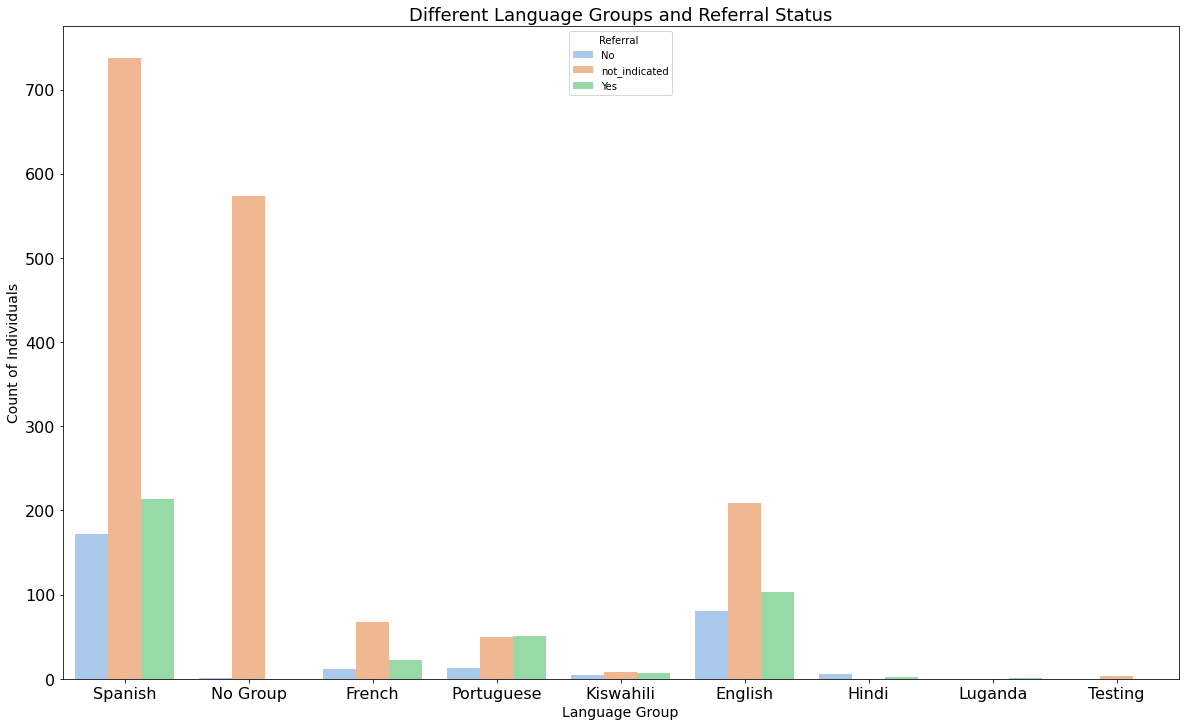

In [50]:
plt.figure(figsize=[20,12])
ax = sns.countplot(x="Group", hue="Referral ", data=df1, palette='pastel')
plt.title("Different Language Groups and Referral Status", size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Language Group", size=14)
plt.ylabel("Count of Individuals", size=14)
plt.savefig("groups and referral status.jpg")

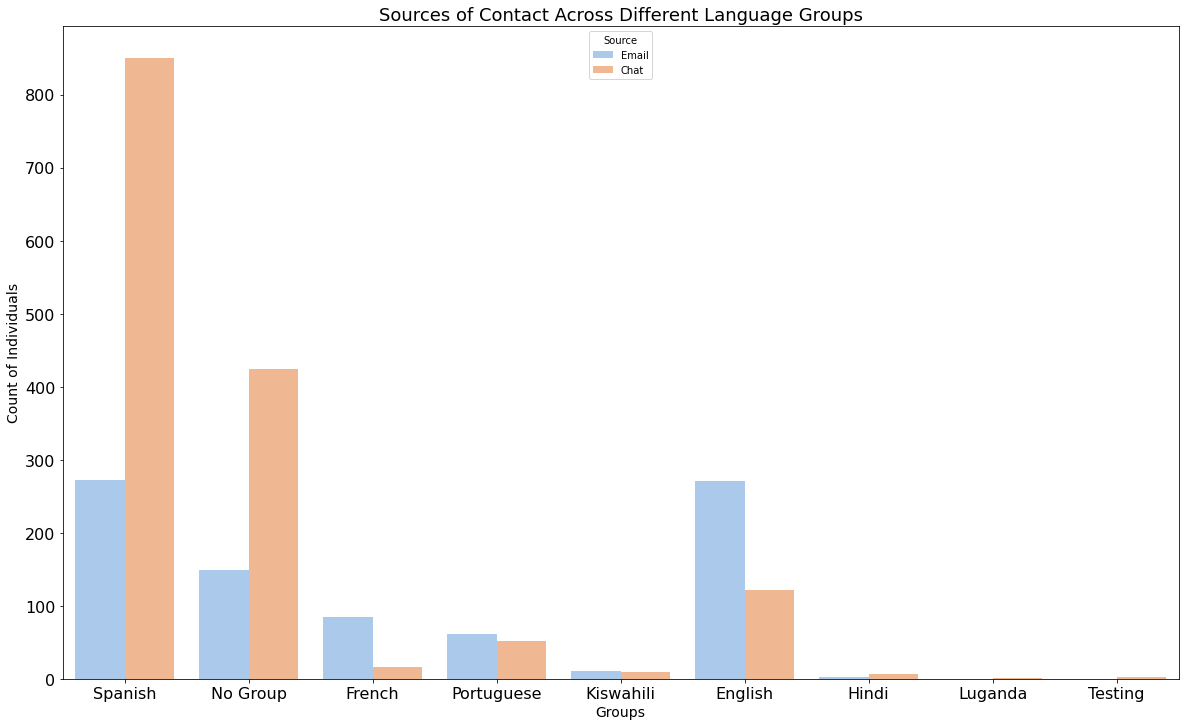

In [51]:
plt.figure(figsize=[20,12])
ax = sns.countplot(x= 'Group', hue="Source", data=df1, palette='pastel')
plt.title("Sources of Contact Across Different Language Groups", size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Groups", size=14)
plt.ylabel("Count of Individuals", size=14)
plt.savefig("groups and modes of communication.jpg")

In [52]:
top_city = (df1.loc[df1['City'] != "not_indicated", 'City']).value_counts().sort_values(ascending=False).head(10)
top_city

Lima                16
Estado de México    12
Puebla               7
Ciudad de México     6
Accra                6
Nairobi              6
Dakar                5
São Paulo            5
Nuevo León           4
La Paz               4
Name: City, dtype: int64

Most customers prefer to communicate via chat than via email. Perhaps chat platforms are more easily available to them compared
to email platforms. Chat platforms can include automated bots, live chats with agents or through Whatsapp and Telegram platforms.

In [53]:
# converting string time column into a float

def convert_to_hours(duration) :
    hours, minutes, seconds = duration.split(":")
    return float(hours) + float(minutes)/60 + float(seconds)/3600


In [54]:
df1["Resolution time (in hrs)"] = df1["Resolution time (in hrs)"].apply(convert_to_hours)

In [55]:
top_time_sessions = pd.DataFrame(df1.groupby("City")["Resolution time (in hrs)"].mean().sort_values(ascending=False).head(10))
top_time_sessions

,Resolution time (in hrs)
City,
Estado de Mexico,18.000000
not_indicated,15.881886
Delta state Asaba,14.230278
Nairobi,13.500000
Kentucky,12.203333
Managua,11.953611
Jakarta,6.992778
Manilla,6.965000
nansana,6.826944


##### Cities and Resolution time

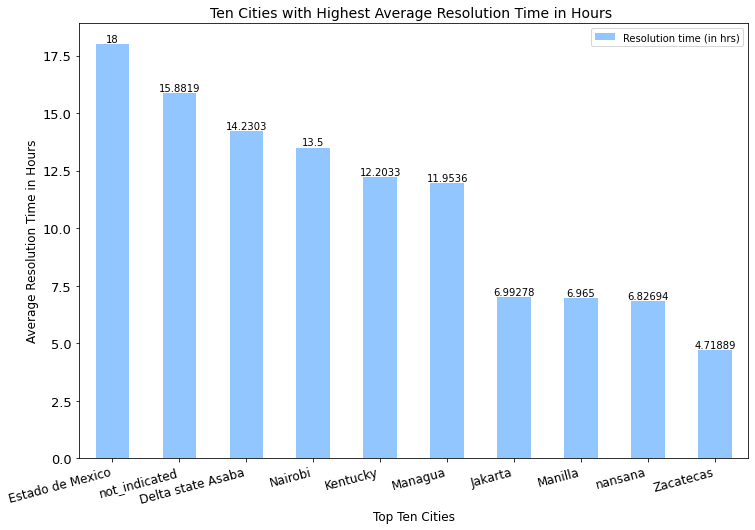

In [56]:
ax = top_time_sessions.plot(kind='bar', fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Ten Cities with Highest Average Resolution Time in Hours ", fontsize=14)
ax.set_ylabel("Average Resolution Time in Hours", fontsize=12);
ax.set_xlabel("Top Ten Cities", fontsize=12)
plt.xticks(fontsize= 14)
plt.savefig("cities and average resolution time.jpg")
plt.xticks(size=12, rotation = 15, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig("timesessions.jpg")
plt.show()

Estado de Mexico, Delta State Asaba and Nairobi seem to be the cities struggling with highest resolution time of their cases.

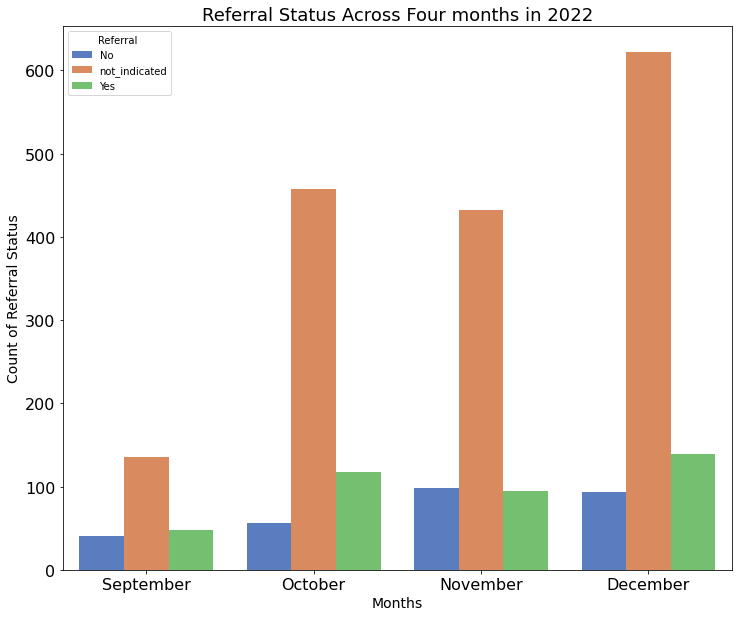

In [57]:
plt.figure(figsize=[12,10])
ax = sns.countplot(x="Month", hue="Referral ", data=df1, palette='muted')
plt.title("Referral Status Across Four months in 2022", size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Months", size=14)
plt.ylabel("Count of Referral Status", size=14)
plt.savefig("x.jpg")

Most people were referred in October and December

In [58]:
# df1["PAC"] = df1["PAC"].map({"false":0, "true": 1})
# df1["PAC"].value_counts()

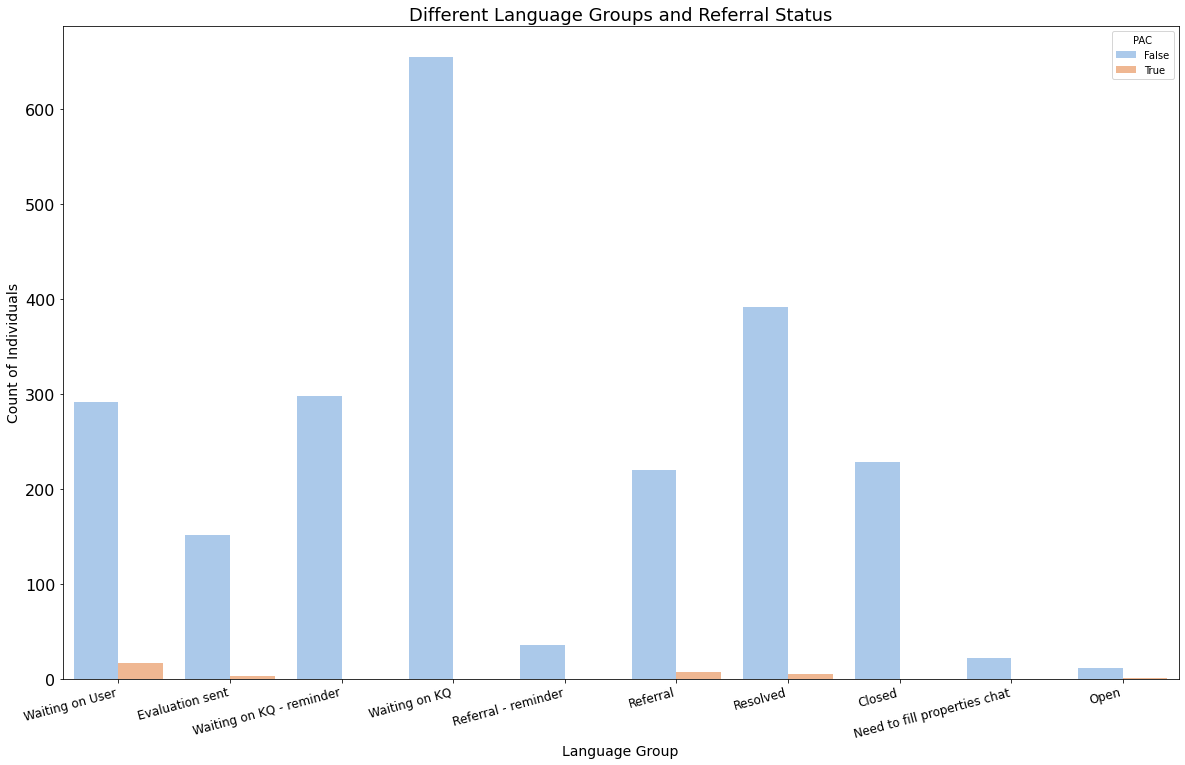

In [59]:
plt.figure(figsize=[20,12])
ax = sns.countplot(x="Status", hue="PAC", data=df1, palette='pastel')
plt.title("Different Language Groups and Referral Status", size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Language Group", size=14)
plt.ylabel("Count of Individuals", size=14)
plt.xticks(size=12, rotation = 15, ha="right")
plt.savefig("groups and referral status.jpg")

In [60]:
# drawing geographical map

init_notebook_mode(connected=True)


In [61]:
data = dict(type="choropleth", locations = ["India", "Brazil", "Philippines", "Mexico", "Liberia", "Kenya", "USA-states", "Ghana",
                                            "Columbia", "Nigeria"],
                                            locationmode = "country names",
                                            colorscale = "Viridis",
                                            text = ["in : 172126", "br : 106594", "ph: 99889", "mx : 90855", "lr : 60141", "ke:57182", 
                                                    "us:53235", "gh:39207", "co: 39142", "ng: 37293"],
                                            z = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
                                            colorbar = {"title" : "countries-colors"})
                                            

In [62]:
layout = dict(geo={"scope": "world"})

In [63]:
chmap = go.Figure(data = [data], layout=layout)

In [64]:
chmap.update_layout (title_text = "September-December 2022 User Access by Country to Safe2Choose website")
iplot(chmap)
plt.savefig("map.jpg")

<Figure size 864x576 with 0 Axes>

##### Linegraph of Users Across the 4 months

In [65]:
# plotting line graph
df_users

,Day Index,Users
0,2022-09-01,8232
1,2022-09-02,8179
2,2022-09-03,7755
3,2022-09-04,7231
4,2022-09-05,8112
...,...,...
117,2022-12-27,14544
118,2022-12-28,14944
119,2022-12-29,14303
120,2022-12-30,12793


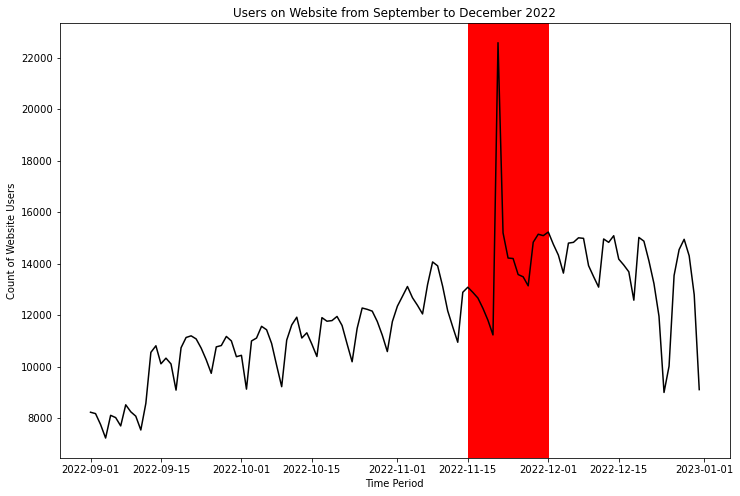

In [66]:
from matplotlib.dates import date2num
from datetime import datetime

# fig,ax=  plt.subplots(figsize=(10,8))
plt.plot(df_users["Day Index"], df_users["Users"], color="black")
plt.title("Users on Website from September to December 2022")
plt.xlabel("Time Period")
plt.ylabel("Count of Website Users")

plt.axvspan(date2num(datetime(2022,11,15)), date2num(datetime(2022,12,1)), color="red")
plt.savefig("timeseries.jpg")
plt.show()

There was a spike in access between mid November and early December. This needs to be examined.

##### Checking Count of Users Across different age-groups

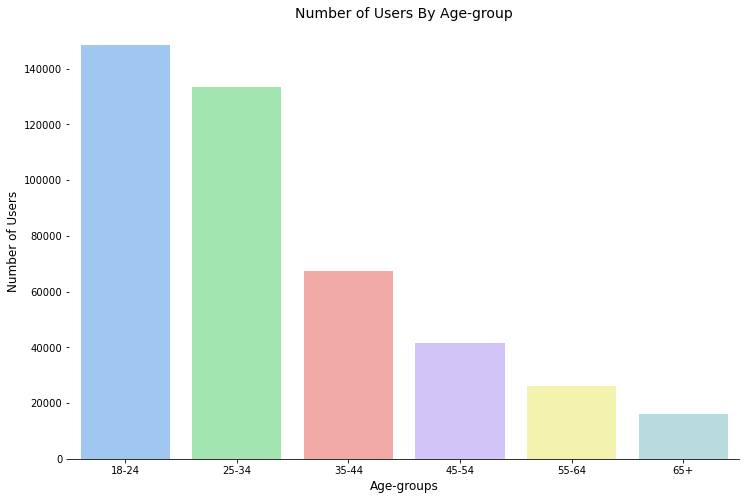

In [67]:
alpha=(0.8)
sns.barplot(data=df_age, x = "Age", y= "Users")
plt.xlabel("Age-groups", size=12)
plt.ylabel("Number of Users", size=12)
plt.title("Number of Users By Age-group", size=14)
plt.savefig("agegroup.jpg")
sns.despine(left=True)

#### Modelling

In [68]:
df1.head(2)

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,First response status,Tags,City,Main reason for contact,In possession of pills,Kind of pills,Amount of pills,Abortion method counselled on,MA,MVA/EVA,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,Referred to on-the-ground org,Referred to direct provider,ageofpregnancy
0,92854,Waiting on User,Email,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,0.0,1,2,Within SLA,not_indicated,not_indicated,Suspected Pregnancy/Pregnancy confirmation,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,No,not_indicated,Suspected Pregnancy,not_indicated,False,False,not_indicated
1,92855,Evaluation sent,Chat,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,0.0,0,1,not_indicated,Away conversation,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,not_indicated,not_indicated,not_indicated,not_indicated,False,False,not_indicated


The project will use status as the target variable. Status 0 which mean all the status that is unsolved and not completed and 1
will reflect all status that is closed and finished. The aim of the project will be to predict the status of a user and therefore
determine whether the website has provide help and effective communication.

In [69]:
df1['Status'].unique()

array(['Waiting on User', 'Evaluation sent', 'Waiting on KQ - reminder',
       'Waiting on KQ', 'Referral - reminder', 'Referral', 'Resolved',
       'Closed', 'Need to fill properties chat', 'Open'], dtype=object)

In [70]:
# creating numerical binary variables in the target variable

df1["Status"] = df1["Status"].map({"Waiting on User":0, "Evaluation sent": 0, "Waiting on KQ - reminder": 0,
                                   "Waiting on KQ": 1, "Referral - reminder": 0, "Referral": 1,
                                   "Resolved": 1, "Closed": 1, "Open": 0, "Need to fill properties chat": 0
                                  })

df1["Status"].value_counts()

1    1507
0     829
Name: Status, dtype: int64

In [71]:
df1["Source"] = df1["Source"].map({"Chat":0, "Email": 1})

df1.head(2)

,Ticket ID,Status,Source,Agent,Group,Created time,Month,Last update time,Resolution time (in hrs),Agent interactions,Customer interactions,First response status,Tags,City,Main reason for contact,In possession of pills,Kind of pills,Amount of pills,Abortion method counselled on,MA,MVA/EVA,D&E,Induction,PAC,Referral,Ability to pay for referral services/products,Reason for not referring,Reason for referral,Referred to on-the-ground org,Referred to direct provider,ageofpregnancy
0,92854,0,1,Julia L,Spanish,2022-09-01 00:01:23,September,2022-09-01 16:32:04,0.0,1,2,Within SLA,not_indicated,not_indicated,Suspected Pregnancy/Pregnancy confirmation,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,No,not_indicated,Suspected Pregnancy,not_indicated,False,False,not_indicated
1,92855,0,0,No Agent,Spanish,2022-09-01 00:05:46,September,2022-09-27 18:12:41,0.0,0,1,not_indicated,Away conversation,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,not_indicated,False,False,False,False,False,not_indicated,not_indicated,not_indicated,not_indicated,False,False,not_indicated


In [72]:
df1.drop(["Ticket ID", "Agent", "Created time", "Last update time", "Tags",
                  "City", 'In possession of pills',
       'Kind of pills', 'Amount of pills', 'Abortion method counselled on',
        'Ability to pay for referral services/products',
       'Reason for not referring', 'Reason for referral','ageofpregnancy'], axis=1, inplace=True)

In [73]:
df1.head(2)

,Status,Source,Group,Month,Resolution time (in hrs),Agent interactions,Customer interactions,First response status,Main reason for contact,MA,MVA/EVA,D&E,Induction,PAC,Referral,Referred to on-the-ground org,Referred to direct provider
0,0,1,Spanish,September,0.0,1,2,Within SLA,Suspected Pregnancy/Pregnancy confirmation,False,False,False,False,False,No,False,False
1,0,0,Spanish,September,0.0,0,1,not_indicated,not_indicated,False,False,False,False,False,not_indicated,False,False


In [74]:
df1.drop("Main reason for contact", axis=1, inplace=True)

In [75]:
df1.columns

Index(['Status', 'Source', 'Group', 'Month', 'Resolution time (in hrs)',
       'Agent interactions', 'Customer interactions', 'First response status',
       'MA', 'MVA/EVA', 'D&E', 'Induction', 'PAC', 'Referral ',
       'Referred to on-the-ground org', 'Referred to direct provider'],
      dtype='object')

In [76]:
df1["Month"].value_counts()

December     855
October      631
November     625
September    225
Name: Month, dtype: int64

In [77]:
df1.head(2)

,Status,Source,Group,Month,Resolution time (in hrs),Agent interactions,Customer interactions,First response status,MA,MVA/EVA,D&E,Induction,PAC,Referral,Referred to on-the-ground org,Referred to direct provider
0,0,1,Spanish,September,0.0,1,2,Within SLA,False,False,False,False,False,No,False,False
1,0,0,Spanish,September,0.0,0,1,not_indicated,False,False,False,False,False,not_indicated,False,False


##### Preprocessing

In [78]:
#assigning X and y variables by splitting df
y = df1["Status"]
X = df1.drop("Status", axis=1)
#performing train_test_Split with random_state=23 for reproducibility and test_size=0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1868, 15)
(468, 15)
(1868,)
(468,)


In [80]:
from sklearn import preprocessing
  

categoricals = ["Group", "Month", "First response status", "MA", 
                "Induction", "PAC", "D&E", "MVA/EVA", 'Referral ',
       'Referred to on-the-ground org', 'Referred to direct provider']

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
X_trainle = X_train[categoricals].apply(label_encoder.fit_transform)

X_train = pd.concat([X_train.drop(categoricals, axis=1), X_trainle], axis=1)
X_train
                            

,Source,Resolution time (in hrs),Agent interactions,Customer interactions,Group,Month,First response status,MA,Induction,PAC,D&E,MVA/EVA,Referral,Referred to on-the-ground org,Referred to direct provider
141,0,11.348889,0,1,5,3,2,0,0,0,0,0,2,0,0
1550,0,0.000000,1,2,7,0,1,1,0,0,0,0,1,1,0
831,0,0.000000,2,2,6,2,1,1,0,0,0,0,1,0,0
1016,1,0.000000,0,1,5,1,2,0,0,0,0,0,2,0,0
498,0,35.226111,0,1,5,2,2,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,0,0.000000,6,1,7,0,1,1,0,0,0,0,1,1,0
1993,1,0.000000,1,2,2,0,0,1,0,0,0,0,1,1,0
1064,0,0.000000,0,1,1,1,2,0,0,0,0,0,0,0,0
742,0,13.227222,0,1,5,2,2,0,0,0,0,0,2,0,0


In [81]:
#transforming test data

X_testle = X_test[categoricals].apply(label_encoder.fit_transform)

# Replace testing columns with transformed versions
X_test = pd.concat([X_test.drop(categoricals, axis=1), X_testle], axis=1)

X_test

,Source,Resolution time (in hrs),Agent interactions,Customer interactions,Group,Month,First response status,MA,Induction,PAC,D&E,MVA/EVA,Referral,Referred to on-the-ground org,Referred to direct provider
1446,1,0.0,0,1,4,1,2,0,0,0,0,0,2,0,0
1883,1,0.0,0,1,4,0,2,0,0,0,0,0,2,0,0
1737,0,90.0,0,1,6,0,2,0,0,0,0,0,2,0,0
19,0,0.0,0,1,6,3,2,0,0,0,0,0,2,0,0
1390,1,0.0,0,1,0,1,2,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,0.0,0,1,4,3,2,0,0,0,0,0,2,0,0
1712,1,90.0,0,1,0,0,2,0,0,0,0,0,2,0,0
2175,0,0.0,1,2,1,0,1,1,0,0,0,0,0,0,0
564,1,0.0,0,1,4,2,2,0,0,0,0,0,2,0,0


In [82]:
X_test.shape

(468, 15)

###### Logistic Regression

In [83]:
#fitting oversampled data to our basic model
log_model = LogisticRegression(random_state=23)


In [84]:
#calculating different metrics for test data
model = log_model.fit(X_train, y_train)
preds = model.predict(X_test)
probs = model.predict_proba(X_test)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  0.4743023799117233
accuracy:  0.7222222222222222
precision: 0.7240506329113924
recall:    0.9315960912052117


C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



###### Decision Tree


In [85]:
baseline_DT_model = DecisionTreeClassifier(random_state=23)

In [86]:
model2 = baseline_DT_model.fit(X_train, y_train)
preds = model2.predict(X_test)
probs = model2.predict_proba(X_test)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  3.7749977930959537
accuracy:  0.8504273504273504
precision: 0.9044368600682594
recall:    0.8631921824104235


##### Random Forest

In [87]:
baseline_RF_model = RandomForestClassifier(random_state=23)

In [88]:
model3 = baseline_RF_model.fit(X_train, y_train)
preds = model3.predict(X_test)
probs = model3.predict_proba(X_test)

print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds))
print("recall:   ", recall_score(y_test, preds))

log loss:  0.8062802282102444
accuracy:  0.8589743589743589
precision: 0.9057239057239057
recall:    0.8762214983713354


The best algorith is the logistic regression with a low log loss or RMSE of 0.474.

#### Conclusion

- Most of the queries on the website tended to be resolved.
- Most users are not handled by actual agents. Perhaps since most prefer to reach out via chats, they interact with automated chat bots rather than actual agents.
- Top 5 cities with the highest number of individuals who have accessed the website are Lima, Estado de Mexico, Puebla, Accra and Nairobi.
- This explains why the two most spoken languages by users are Spanish and English.
- Biggest reasons that consumers establish contact are to seek abortion services and to seek pills.
- Biggest reason consumers were not referred was because they dropped off the chat or conversation.
- Biggest reason for users being referred was to access pills.
- Estado de Mexico, Delta State Asaba and Nairobi seem to be the cities struggling with highest resolution time of their cases.
- There was a spike in access to webite between mid November and early December. This needs to be examined.
- Age-group 18-24 years shows the higher user access to the website.